# TAREA

Sofia Macarena Castillo Badilla

- subir archivos EEG de excel, obtener de la primera hoja un grafo bidimensional
- de la matriz EEG usando las coordenadas de EEG_3D_coordinates

In [3]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
EEG_path = r"C:\Users\maria\OneDrive\Documentos\EEG.xlsx"
EEG_coor_path = r"C:\Users\maria\OneDrive\Documentos\EEG_3D_coordinates.xlsx"

In [5]:
EEG = pd.read_excel(EEG_path)
EEG_coord = pd.read_excel(EEG_coor_path)

In [6]:
EEG_df = pd.read_excel(EEG_path, sheet_name = "coherence_motorimagery_alpha")
EEG_df.set_index("Unnamed: 0", drop = True, inplace = True)
EEG_df

,F3,F4,C3,C4,P3,P4,O1,O2
Unnamed: 0,,,,,,,,
F3,1.00,0.58,0.46,0.40,0.22,0.18,0.12,0.10
F4,0.58,1.00,0.44,0.39,0.20,0.17,0.11,0.09
C3,0.46,0.44,1.00,0.62,0.25,0.22,0.13,0.11
C4,0.40,0.39,0.62,1.00,0.23,0.21,0.12,0.10
P3,0.22,0.20,0.25,0.23,1.00,0.55,0.28,0.20
P4,0.18,0.17,0.22,0.21,0.55,1.00,0.27,0.19
O1,0.12,0.11,0.13,0.12,0.28,0.27,1.00,0.48
O2,0.10,0.09,0.11,0.10,0.20,0.19,0.48,1.00


In [7]:
EEG_coord_df = pd.read_excel(EEG_coor_path, sheet_name = "Motor_Imagery")
EEG_coord_df

,Canal,x,y,z
0,F3,-0.45,0.6,0.65
1,F4,0.45,0.6,0.65
2,C3,-0.55,0.0,0.83
3,C4,0.55,0.0,0.83
4,P3,-0.45,-0.6,0.65
5,P4,0.45,-0.6,0.65
6,O1,-0.30,-0.9,0.35
7,O2,0.30,-0.9,0.35


Agregar los nodos

In [8]:
G = nx.Graph()
G.add_nodes_from(EEG_coord_df["Canal"])

Agregar las coordenadas

In [9]:
pos = EEG_coord_df.set_index("Canal")[["x", "y"]].apply(tuple, axis=1).to_dict()
pos

{'F3': (-0.45, 0.6),
 'F4': (0.45, 0.6),
 'C3': (-0.55, 0.0),
 'C4': (0.55, 0.0),
 'P3': (-0.45, -0.6),
 'P4': (0.45, -0.6),
 'O1': (-0.3, -0.9),
 'O2': (0.3, -0.9)}

Agregar las conexiones

In [10]:
for i in EEG_df.index:
    for j in EEG_df.columns:
        weight = EEG_df.loc[i, j]
        if weight != 0:  # evita conexiones nulas
            G.add_edge(i, j, weight=weight)

print(G.edges(data=True))

[('F3', 'F3', {'weight': np.float64(1.0)}), ('F3', 'F4', {'weight': np.float64(0.58)}), ('F3', 'C3', {'weight': np.float64(0.46)}), ('F3', 'C4', {'weight': np.float64(0.4)}), ('F3', 'P3', {'weight': np.float64(0.22)}), ('F3', 'P4', {'weight': np.float64(0.18)}), ('F3', 'O1', {'weight': np.float64(0.12)}), ('F3', 'O2', {'weight': np.float64(0.1)}), ('F4', 'F4', {'weight': np.float64(1.0)}), ('F4', 'C3', {'weight': np.float64(0.44)}), ('F4', 'C4', {'weight': np.float64(0.39)}), ('F4', 'P3', {'weight': np.float64(0.2)}), ('F4', 'P4', {'weight': np.float64(0.17)}), ('F4', 'O1', {'weight': np.float64(0.11)}), ('F4', 'O2', {'weight': np.float64(0.09)}), ('C3', 'C3', {'weight': np.float64(1.0)}), ('C3', 'C4', {'weight': np.float64(0.62)}), ('C3', 'P3', {'weight': np.float64(0.25)}), ('C3', 'P4', {'weight': np.float64(0.22)}), ('C3', 'O1', {'weight': np.float64(0.13)}), ('C3', 'O2', {'weight': np.float64(0.11)}), ('C4', 'C4', {'weight': np.float64(1.0)}), ('C4', 'P3', {'weight': np.float64(0.2

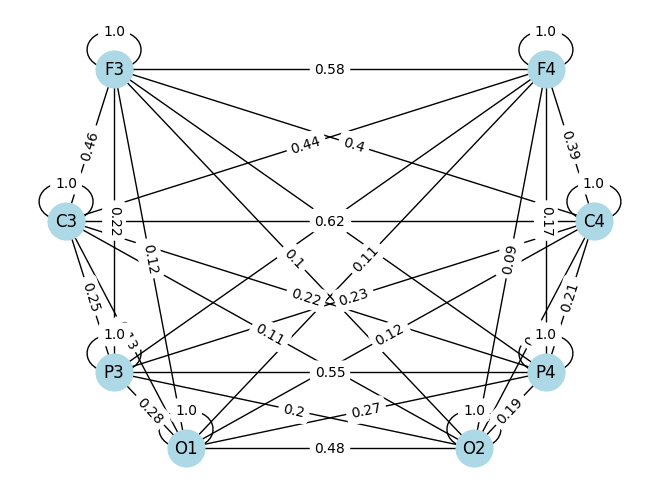

In [11]:
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=700)

labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels);